In [30]:
# Setup tesseract
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
print("Tesseract version:", pytesseract.get_tesseract_version())

Tesseract version: 5.5.0.20241111


In [34]:
#Test OCR on image
from PIL import Image

img = Image.open("test_page.png")
text = pytesseract.image_to_string(img)
print(text)

Daffodils

William Wordsworth

I wandered lonely as a cloud
That floats on high o'er vales and hills,
When all at once I saw a crowd,
A host, of golden daffodils;
Beside the lake, beneath the trees,
Fluttering and dancing in the breeze.

Continuous as the stars that shine
And twinkle on the milky way,
They stretched in never-ending line
Along the margin of a bay:

Ten thousand saw I at a glance,
Tossing their heads in sprightly dance.

The waves beside them danced; but they
Out-did the sparkling waves in glee:
A poet could not but be gay,
In such a jocund company:
zed—and gazed—but little thought
wealth the show to me had brought:

For oft, when on my couch I lie
In vacant or in pensive mood,
They flash upon that inward eye
Which is the bliss of solitude;



### Sample image used
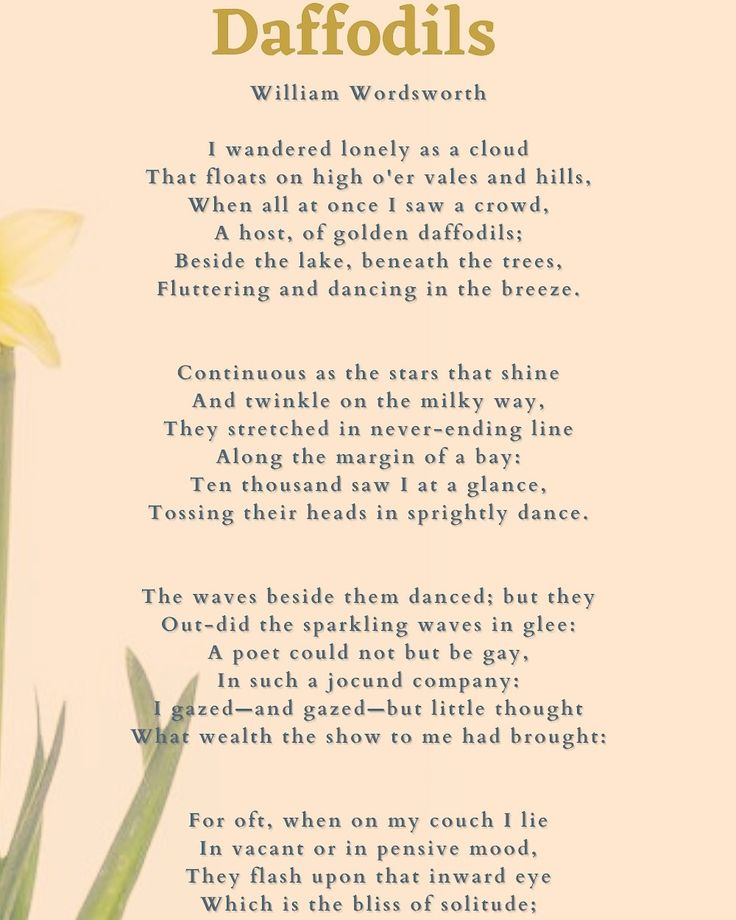

In [35]:
#Test OCR on PDF
import fitz  # PyMuPDF

# Open PDF
doc = fitz.open("LegisAI.pdf")

# Extract first page as image
page = doc[0]  
pix = page.get_pixmap(dpi=300)  # render page as high-res image
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

# Run OCR
text = pytesseract.image_to_string(img)
print(text)


LegisAl -— Multi-Agent Legal Research &
Drafting Assistant

Legal research and drafting consume significant time, requiring lawyers to parse through
thousands of pages of case law, statutes, regulations, and prior contracts. Errors or
omissions can have major financial and reputational consequences. Current legal
research tools are search-heavy and siloed, offering little support in drafting, compliance

review, or collaborative workflows.

LegisAl is a multi-agent Al assistant that combines retrieval, reasoning, drafting,
compliance, and explainability into a single ecosystem. It acts as both a “co-pilot” for
lawyers and an automation engine for firms, reducing costs while increasing accuracy,

transparency, and speed.

1. Objective and End-Goal

e Build an end-to-end Al legal assistant that handles research, drafting,
compliance, and summarization.

e Provide multi-agent orchestration where specialized agents collaborate: research
agent, drafting agent, compliance checker, voice assi

In [36]:
#OCR on sample document
import fitz  # PyMuPDF
from PIL import Image
import pytesseract
from tqdm import tqdm

pdf_path = "sample_data.pdf"
doc = fitz.open(pdf_path)

all_text = []

for page_num, page in enumerate(tqdm(doc, desc="Processing pages"), start=1):
    pix = page.get_pixmap(dpi=300)  # render page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    text = pytesseract.image_to_string(img)
    all_text.append(text)

# Combine all pages into one string
full_text = "\n".join(all_text)

# Save to a text file
with open("LegisAI_full_ocr.txt", "w", encoding="utf-8") as f:
    f.write(full_text)

print("\nOCR complete, text saved to LegisAI_full_ocr.txt")

Processing pages: 100%|████████████████████████████████████████████████████████████████| 26/26 [01:33<00:00,  3.58s/it]


OCR complete, text saved to LegisAI_full_ocr.txt


In [37]:
# Printing 1st 800 characters of each page
for i, page_text in enumerate(all_text, start=1):
    print(f"\nPage {i}\n")
    print(page_text[:800])


Page 1

Request for Expressions of Interest for TCCS Expansion

APPENDIX F: CONTRACT TERMS AND CONDITIONS

Note to Contract Terms and Conditions:

The terms set out in this Appendix F: Contract Terms and Conditions shall be incorporated
in any Contract entered into with the recommended Proponent substantially in the form
as presented in this Appendix F: Contract Terms and Conditions. These terms are
mandatory and are not negotiable.

These Appendix F: Contract Terms and Conditions are deemed to be incorporated into
and take precedence over the terms of any purchase order issued in connection with this
REOI.

ARTICLE 1 — DEFINITIONS
“Business Day" means any working day, Monday to Friday inclusive, but excluding
statutory holidays, and any other day which the City has elected to be closed for busine

Page 2

Request for Expressions of Interest for TCCS Expansion

in relation to the performance of its contractual obligations in the Contract, the Supplier’s
other commitments, relationship

In [38]:
print(f"Total characters extracted: {len(full_text)}")
print(f"Total pages: {len(all_text)}")

Total characters extracted: 62278
Total pages: 26


In [54]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Run NER
doc = nlp(full_text)

# Collect entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print sample
print("Sample entities:", entities[:30])
print(f"\nTotal entities found: {len(entities)}")

Sample entities: [('TERMS', 'ORG'), ('CONDITIONS\n\nNote to', 'ORG'), ('this Appendix F: Contract Terms and Conditions', 'FAC'), ('Proponent', 'NORP'), ('ARTICLE 1', 'LAW'), ('Monday', 'DATE'), ('Friday', 'DATE'), ('City Confidential Information', 'ORG'), ('Supplier', 'PERSON'), ('Contract', 'ORG'), ('Supplier', 'PERSON'), ('third', 'ORDINAL'), ('Personal Information and Personal Health Information', 'ORG'), ('6', 'CARDINAL'), ('Supplier', 'PERSON'), ('Supplier', 'PERSON'), ('third', 'ORDINAL'), ('Supplier', 'PERSON'), ('Supplier', 'PERSON'), ('third', 'ORDINAL'), ('Supplier', 'PERSON'), ('Supplier', 'PERSON'), ('Supplier', 'PERSON'), ('Personal Information, Personal Health\nInformation', 'ORG'), ('Contract', 'PERSON'), ('Conflict of Interest', 'WORK_OF_ART'), ('1', 'CARDINAL'), ('26', 'CARDINAL'), ('Contract', 'ORG'), ('Supplier', 'PERSON')]

Total entities found: 743


In [55]:
from collections import defaultdict

grouped = defaultdict(list)
for text, label in entities:
    grouped[label].append(text)

for label, values in grouped.items():
    print(f"\n{label}:")
    print(list(set(values))[:10])  # show first 10 unique



ORG:
['Proceedings', 'City Confidential Information', 'the Ontario Human Rights Code', 'Personal Information', 'TRA', 'Persons', 'City Confidential\nInformation', 'BOMA', 'Personal Information or Personal Health Information', 'Budget of the City for a previous Fiscal Year']

FAC:
['this Appendix F: Contract Terms and Conditions', 'Metro Hall\n\nToronto']

NORP:
['Rates', 'Ontarians', 'Proponent', 'Canadian']

LAW:
['ARTICLE 1', 'ARTICLE 8 - TERMINATION', 'ARTICLE 4 - PAYMENT FOR PERFORMANCE', 'ARTICLE 10 - ENVIRONMENTAL REQUIREMENTS\n\nThe Supplier', 'ARTICLE 5 - CONFIDENTIALITY', 'ARTICLE 9 - FORCE MAJEURE\n\n', 'ARTICLE 2 — NATURE OF RELATIONSHIP', 'Article may', 'ARTICLE 3 - PERFORMANCE BY SUPPLIER', 'ARTICLE 11 - SERVICE']

DATE:
["30 days'", 'Friday', 'S.O. 1997', 'the first Fiscal Year', 'days', '15 Business Days', '60 Business Days', "24 months'", '2004', '1990']

PERSON:
['c. M.56', 'John Street', 'Requirements', 'Floor', 'Intellectual Property', 'Deliverable', 'Deliverables',